In [7]:
from tiingo import TiingoClient

config = {}

# To reuse the same HTTP Session across API calls (and have better performance), include a session key.
config['session'] = True

# If you don't have your API key as an environment variable,
# pass it in via a configuration dictionary.
config['api_key'] = "4ea77a19c96ffbf6185194586456b134dd42a804"

# Initialize
client = TiingoClient(config)


In [8]:
class stock:
    def __init__(self, symbol, purchase_date, quantity):
        self.symbol = symbol
        self.purchase_date = purchase_date
        self.quantity = quantity

In [6]:
tickers = input("Enter a comma separated list of stocks (e.g., 'aapl, googl, tsla')").split(',')
tickers = [stock.strip() for stock in tickers]
print(tickers)

stocks = []
print("Enter purchase date and quantity for each stock:")
for ticker in tickers:
    purchase_date = input(ticker + " purchase date (YYYY-MM-DD)")
    quantity = float(input(ticker + " number of shares purchased"))
    s = stock(ticker, purchase_date, quantity)
    stocks.append(s)


history = client.get_dataframe(tickers,
                              frequency='daily',
                              metric_name='adjClose',   # request EOD price
                              startDate=stocks[0].purchase_date,   # TODO defaults to first purchase date
                              endDate='2020-11-14')
history

Enter a comma separated list of stocks (e.g., 'aapl, googl, tsla')itot,ixus,agg
['itot', 'ixus', 'agg']
Enter purchase date and quantity for each stock:
itot purchase date (YYYY-MM-DD)2020-03-01
itot number of shares purchased71
ixus purchase date (YYYY-MM-DD)2020-03-01
ixus number of shares purchased45
agg purchase date (YYYY-MM-DD)2020-03-01
agg number of shares purchased6


,itot,ixus,agg
date,,,
2020-03-02 00:00:00+00:00,68.689353,56.115810,114.257684
2020-03-03 00:00:00+00:00,66.824618,55.571188,115.036221
2020-03-04 00:00:00+00:00,69.429328,56.957497,114.947527
2020-03-05 00:00:00+00:00,67.189672,55.581090,115.302303
2020-03-06 00:00:00+00:00,65.985980,54.788914,116.149825
...,...,...,...
2020-11-09 00:00:00+00:00,80.400000,62.610000,117.250000
2020-11-10 00:00:00+00:00,80.350000,62.740000,117.060000
2020-11-11 00:00:00+00:00,80.870000,63.130000,117.130000


In [9]:
import pandas as pd

print(list(history.columns))
for i, column in enumerate(list(history.columns)):
    history[column] = history[column] * stocks[i].quantity

history['total'] = history.sum(axis=1)    # sum across the axis
history

['itot', 'ixus', 'agg']


,itot,ixus,agg,total
date,,,,
2020-03-02 00:00:00+00:00,4876.944095,2525.211428,685.546106,8087.701628
2020-03-03 00:00:00+00:00,4744.547882,2500.703464,690.217327,7935.468674
2020-03-04 00:00:00+00:00,4929.482275,2563.087371,689.685163,8182.254808
2020-03-05 00:00:00+00:00,4770.466717,2501.149064,691.813821,7963.429602
2020-03-06 00:00:00+00:00,4685.004612,2465.501117,696.898948,7847.404676
...,...,...,...,...
2020-11-09 00:00:00+00:00,5708.400000,2817.450000,703.500000,9229.350000
2020-11-10 00:00:00+00:00,5704.850000,2823.300000,702.360000,9230.510000
2020-11-11 00:00:00+00:00,5741.770000,2840.850000,702.780000,9285.400000


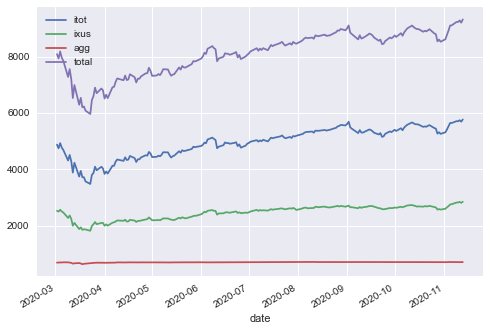

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('seaborn')
history.plot()